In [1]:
import pandas as pd
df = pd.read_csv('data.csv', 
                 names=['time', 'low', 'high', 'open', 'close', 'volume', 'tw_sentiment', 'tw_followers', 'reddit_sentiment']
                )
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
0,1519997640,10969.0,10969.01,10969.01,10969.00,0.111542,0.195409,607130.0,0.113258
1,1519997700,10969.0,10969.00,10969.00,10969.00,0.504804,0.195409,607131.0,0.113258
2,1519997760,10965.0,10965.01,10965.00,10965.01,0.622844,0.195409,607135.0,0.113258
3,1519997820,10965.0,10965.00,10965.00,10965.00,0.036500,0.195408,607140.0,0.113258
4,1519997880,10964.8,10964.81,10964.81,10964.80,0.762078,0.195451,607349.0,0.113258


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
count,2.916000e+03,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2.916000e+03,2916.000000
mean,1.520085e+09,11208.211187,11210.622082,11209.395103,11209.469516,1.465436,0.054805,1.029932e+06,0.138590
std,5.051409e+04,184.535842,184.280898,184.414286,184.417351,1.933775,0.040701,2.495668e+05,0.022375
min,1.519998e+09,10765.000000,10786.810000,10785.010000,10782.000000,0.000111,-0.004737,4.487650e+05,0.059554
25%,1.520041e+09,11102.110000,11108.187500,11102.120000,11102.120000,0.301699,0.024063,8.856165e+05,0.123677
50%,1.520085e+09,11247.995000,11250.000000,11249.990000,11249.895000,0.871491,0.051242,1.025358e+06,0.138813
75%,1.520129e+09,11343.022500,11345.000000,11343.870000,11343.862500,1.887434,0.082558,1.179284e+06,0.157332
max,1.520173e+09,11492.370000,11493.750000,11493.750000,11493.740000,23.988752,0.195451,1.707796e+06,0.176271


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment
time,1.000000,0.499446,0.500118,0.499677,0.499724,-0.137953,-0.561647,-0.072501,0.077858
low,0.499446,1.000000,0.999496,0.999698,0.999786,-0.023734,0.124308,-0.113395,0.407335
high,0.500118,0.999496,1.000000,0.999763,0.999745,-0.011507,0.124091,-0.113692,0.407504
open,0.499677,0.999698,0.999763,1.000000,0.999539,-0.017966,0.124464,-0.114060,0.407544
close,0.499724,0.999786,0.999745,0.999539,1.000000,-0.016847,0.124246,-0.113091,0.407347
volume,-0.137953,-0.023734,-0.011507,-0.017966,-0.016847,1.000000,0.075835,0.092125,-0.055702
tw_sentiment,-0.561647,0.124308,0.124091,0.124464,0.124246,0.075835,1.000000,-0.182525,0.295501
tw_followers,-0.072501,-0.113395,-0.113692,-0.114060,-0.113091,0.092125,-0.182525,1.000000,-0.045426
reddit_sentiment,0.077858,0.407335,0.407504,0.407544,0.407347,-0.055702,0.295501,-0.045426,1.000000


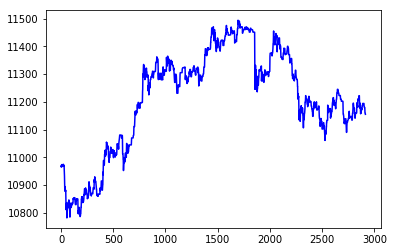

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['close'], 'b')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
X = df[['open', 'reddit_sentiment', 'tw_sentiment', 'tw_followers']]
y = df['close'].values.reshape(-1, 1)

In [7]:
scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))
X_scale = scalerX.fit_transform(X)
y_scale = scalerY.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.3, shuffle=False)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(2041, 1, 4)

In [17]:
np.random.seed(42)

model = Sequential()

model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('linear'))
model.summary()

model.compile(loss='mae', optimizer='adam')
model.fit(X_train, y_train, batch_size=X_train.shape[0], 
          epochs=400, validation_data=(X_test, y_test), shuffle=False, verbose=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1, 200)            164000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 485,001
Trainable params: 485,001
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 68/400
2041/2041 [==============================] - 0s 68us/step - loss: 0.1226 - val_loss: 0.0726
Epoch 69/400
2041/2041 [==============================] - 0s 62us/step - loss: 0.1193 - val_loss: 0.0722
Epoch 70/400
2041/2041 [==============================] - 0s 57us/step - loss: 0.1170 - val_loss: 0.0724
Epoch 71/400
2041/2041 [==============================] - 0s 55us/step - loss: 0.1155 - val_loss: 0.0730
Epoch 72/400
2041/2041 [==============================] - 0s 55us/step - loss: 0.1101 - val_loss: 0.0731
Epoch 73/400
2041/2041 [==============================] - 0s 59us/step - loss: 0.1057 - val_loss: 0.0725
Epoch 74/400
2041/2041 [==============================] - 0s 71us/step - loss: 0.1027 - val_loss: 0.0710
Epoch 75/400
2041/2041 [==============================] - 0s 59us/step - loss: 0.1002 - val_loss: 0.0690
Epoch 76/400
2041/2041 [==============================] - 0s 60us/step - loss: 0.0948 - val_loss: 0.0667
Epoch 77/400
2041/2041 [==============================]

Epoch 146/400
2041/2041 [==============================] - 0s 72us/step - loss: 0.0493 - val_loss: 0.0256
Epoch 147/400
2041/2041 [==============================] - 0s 101us/step - loss: 0.0493 - val_loss: 0.0282
Epoch 148/400
2041/2041 [==============================] - 0s 97us/step - loss: 0.0481 - val_loss: 0.0292
Epoch 149/400
2041/2041 [==============================] - 0s 101us/step - loss: 0.0488 - val_loss: 0.0290
Epoch 150/400
2041/2041 [==============================] - 0s 77us/step - loss: 0.0493 - val_loss: 0.0263
Epoch 151/400
2041/2041 [==============================] - 0s 70us/step - loss: 0.0490 - val_loss: 0.0243
Epoch 152/400
2041/2041 [==============================] - 0s 94us/step - loss: 0.0493 - val_loss: 0.0263
Epoch 153/400
2041/2041 [==============================] - 0s 103us/step - loss: 0.0490 - val_loss: 0.0278
Epoch 154/400
2041/2041 [==============================] - 0s 80us/step - loss: 0.0489 - val_loss: 0.0275
Epoch 155/400
2041/2041 [==================

Epoch 224/400
2041/2041 [==============================] - 0s 65us/step - loss: 0.0401 - val_loss: 0.0187
Epoch 225/400
2041/2041 [==============================] - 0s 61us/step - loss: 0.0409 - val_loss: 0.0160
Epoch 226/400
2041/2041 [==============================] - 0s 88us/step - loss: 0.0410 - val_loss: 0.0164
Epoch 227/400
2041/2041 [==============================] - 0s 102us/step - loss: 0.0398 - val_loss: 0.0196
Epoch 228/400
2041/2041 [==============================] - 0s 100us/step - loss: 0.0411 - val_loss: 0.0218
Epoch 229/400
2041/2041 [==============================] - 0s 103us/step - loss: 0.0402 - val_loss: 0.0160
Epoch 230/400
2041/2041 [==============================] - 0s 66us/step - loss: 0.0406 - val_loss: 0.0156
Epoch 231/400
2041/2041 [==============================] - 0s 90us/step - loss: 0.0395 - val_loss: 0.0176
Epoch 232/400
2041/2041 [==============================] - 0s 90us/step - loss: 0.0404 - val_loss: 0.0184
Epoch 233/400
2041/2041 [==================

Epoch 302/400
2041/2041 [==============================] - 0s 66us/step - loss: 0.0349 - val_loss: 0.0167
Epoch 303/400
2041/2041 [==============================] - 0s 61us/step - loss: 0.0346 - val_loss: 0.0158
Epoch 304/400
2041/2041 [==============================] - 0s 61us/step - loss: 0.0352 - val_loss: 0.0118
Epoch 305/400
2041/2041 [==============================] - 0s 60us/step - loss: 0.0351 - val_loss: 0.0124
Epoch 306/400
2041/2041 [==============================] - 0s 64us/step - loss: 0.0355 - val_loss: 0.0179
Epoch 307/400
2041/2041 [==============================] - 0s 66us/step - loss: 0.0348 - val_loss: 0.0133
Epoch 308/400
2041/2041 [==============================] - 0s 65us/step - loss: 0.0348 - val_loss: 0.0110
Epoch 309/400
2041/2041 [==============================] - 0s 62us/step - loss: 0.0362 - val_loss: 0.0146
Epoch 310/400
2041/2041 [==============================] - 0s 61us/step - loss: 0.0350 - val_loss: 0.0169
Epoch 311/400
2041/2041 [=====================

2041/2041 [==============================] - 0s 70us/step - loss: 0.0325 - val_loss: 0.0094
Epoch 380/400
2041/2041 [==============================] - 0s 111us/step - loss: 0.0316 - val_loss: 0.0110
Epoch 381/400
2041/2041 [==============================] - 0s 105us/step - loss: 0.0327 - val_loss: 0.0159
Epoch 382/400
2041/2041 [==============================] - 0s 62us/step - loss: 0.0326 - val_loss: 0.0123
Epoch 383/400
2041/2041 [==============================] - 0s 62us/step - loss: 0.0324 - val_loss: 0.0103
Epoch 384/400
2041/2041 [==============================] - 0s 63us/step - loss: 0.0322 - val_loss: 0.0122
Epoch 385/400
2041/2041 [==============================] - 0s 87us/step - loss: 0.0315 - val_loss: 0.0163
Epoch 386/400
2041/2041 [==============================] - 0s 96us/step - loss: 0.0311 - val_loss: 0.0119
Epoch 387/400
2041/2041 [==============================] - 0s 69us/step - loss: 0.0325 - val_loss: 0.0100
Epoch 388/400
2041/2041 [==============================] -

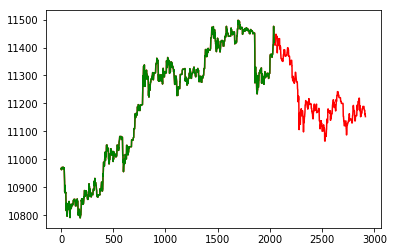

In [11]:
y_predict_train = model.predict(X_train)
y_predict_train = scalerY.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scalerY.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [18]:
import time
from enum import Enum

class Order(Enum):
    STAY = 1
    DOWN = 2
    UP = 3

n_error = 0
y_predict_last = y_last = None
for index, row in df.iterrows():
    if y_predict_last is None:
        y_predict_last = y_last = row['open']
        
    x_predict = np.array([row['open'], row['reddit_sentiment'], row['tw_sentiment'], row['tw_followers']]).reshape(1, -1)
    x_predict = scalerX.transform(x_predict)
    x_predict_reshaped = np.reshape(x_predict, (1, 1, 4))
    y_predict_r = model.predict(x_predict_reshaped)
    y_predict_r_rescaled = scalerY.inverse_transform(y_predict_r)

    predict_order = real_order = Order.DOWN
    if y_predict_last < y_predict_r_rescaled:
        predict_order = Order.UP
    elif y_predict_last == y_predict_r_rescaled:
        predict_order = Order.STAY

    if y_last < row['open']:
        real_order = Order.UP
    elif y_last == row['open']:
        real_order = Order.STAY
    
    y_predict_last = y_predict_r_rescaled
    y_last = row['open']
    
    if real_order != predict_order:
        #print('predicted %s, real %s'% (predict_order, real_order))
        n_error = n_error + 1
        
count = df['open'].count()
percent = (n_error / count) * 100
print("Error Order percentage: %0.2f%%" % percent)

Error Order percentage: 6.31%
